<a href="https://colab.research.google.com/github/zzhu76/Hemingway-Text-Visualization/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization


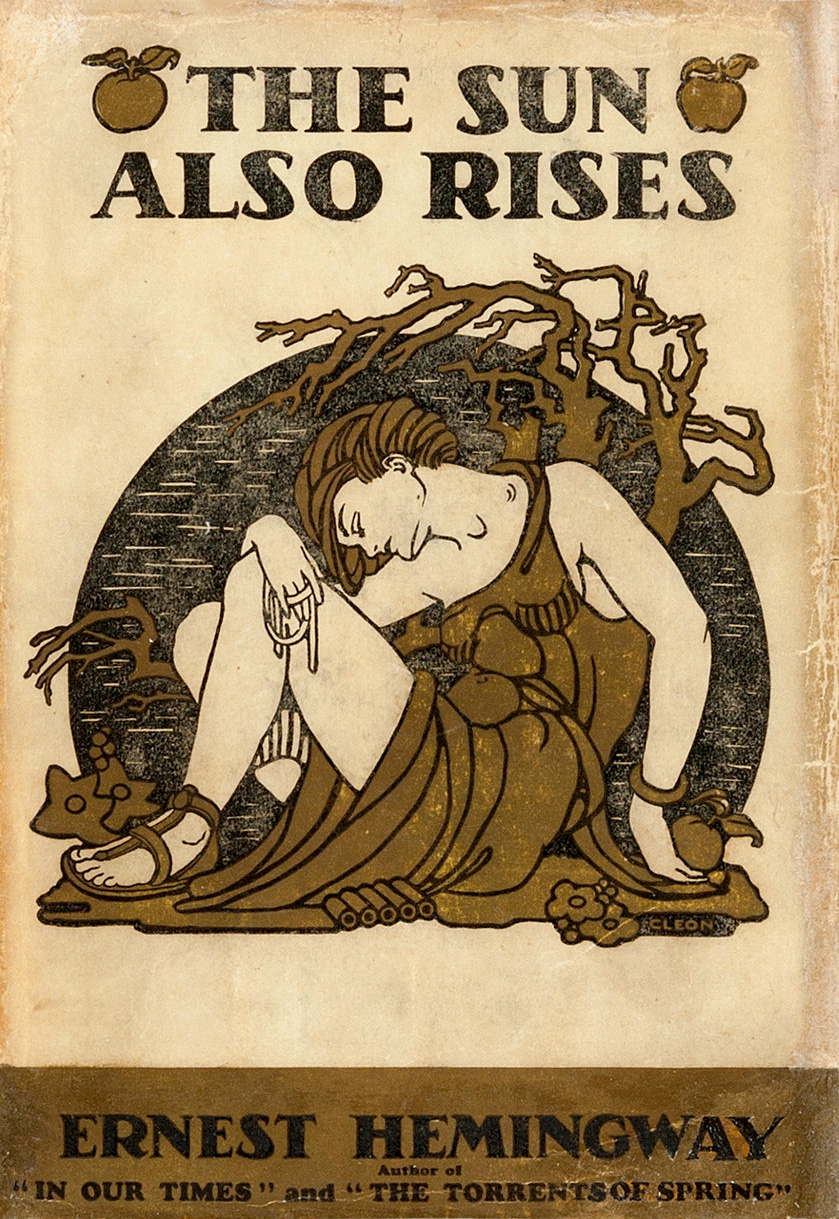

## Output of CV Label

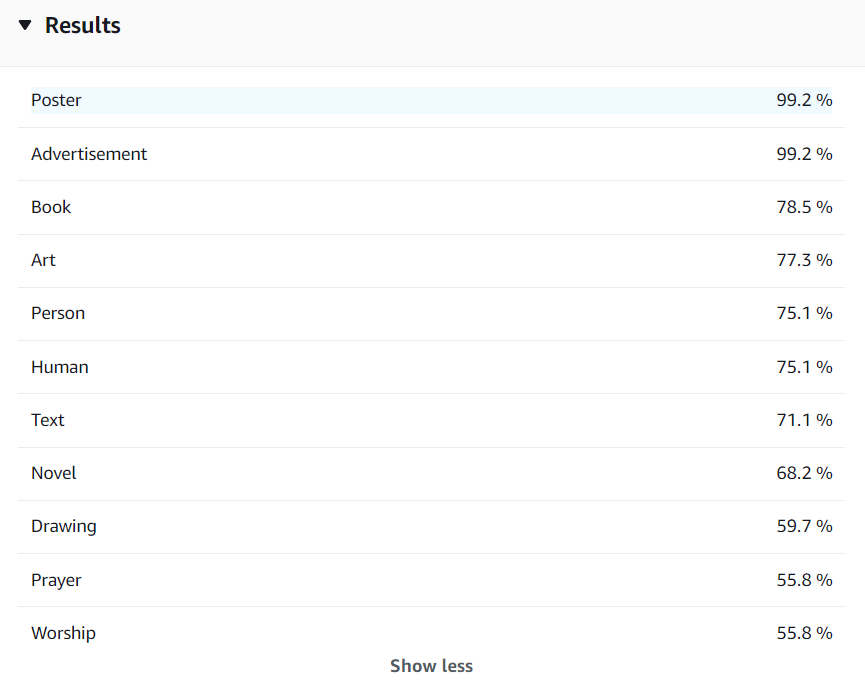

### Chapter 1 Analysis

#### Amazon Comprehend 

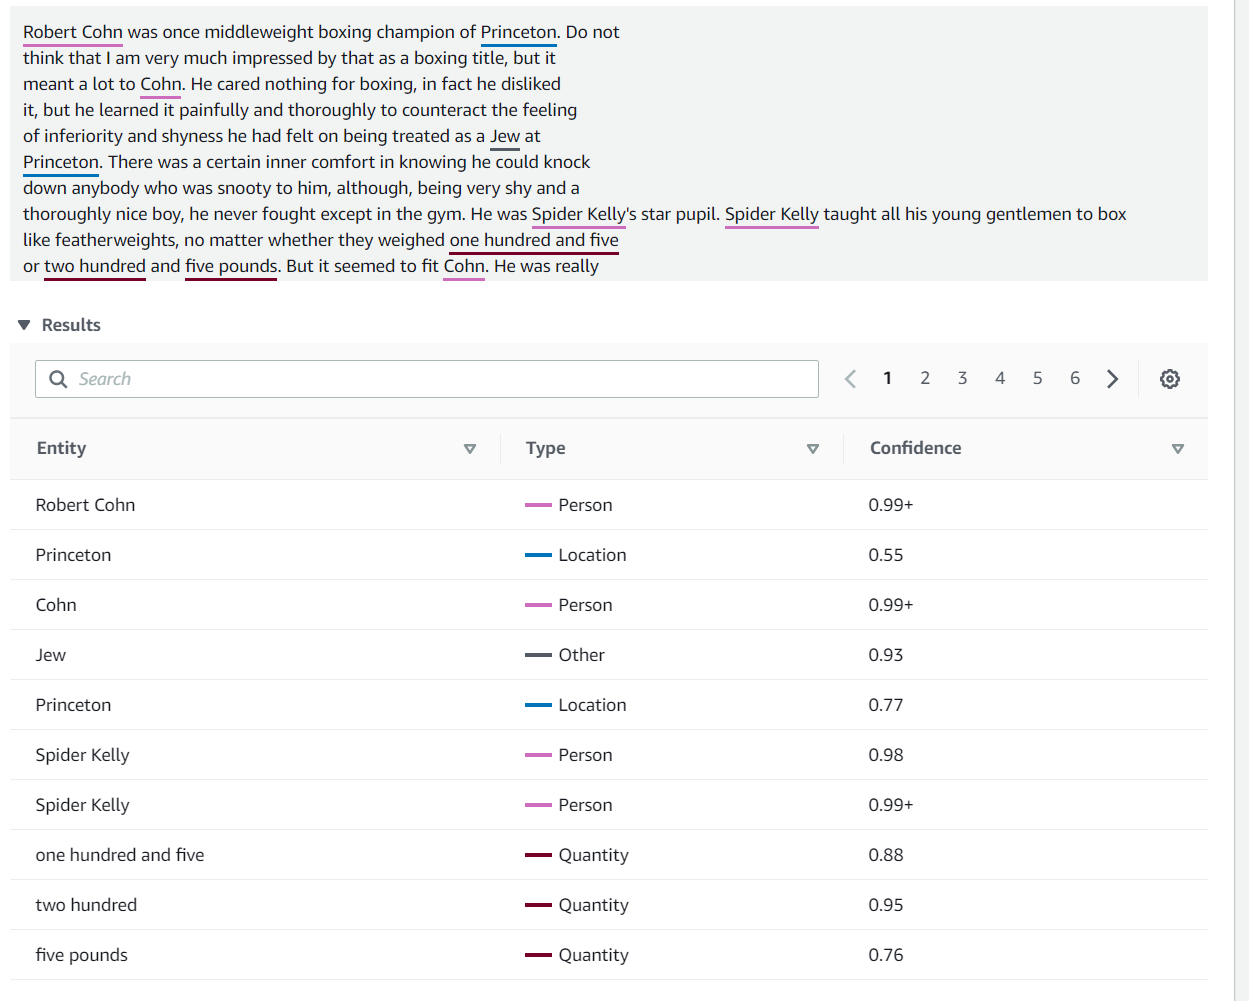

#### GUI Sentiment Analysis

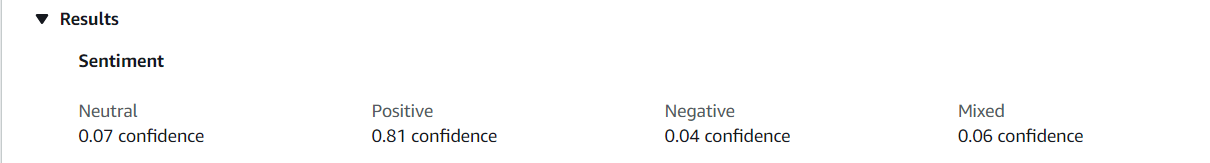

## Ingest

In [75]:
import urllib.request
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import re



In [76]:
url_1 = "http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-t.txt"
file_1 = urllib.request.urlopen(url_1)

url_2 = "http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-t.txt"
file_2 = urllib.request.urlopen(url_2)

url_3 = "http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-t.txt"
file_3 = urllib.request.urlopen(url_3)

url_4 = "http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-t.txt"
file_4 = urllib.request.urlopen(url_4)
files = [file_1, file_2, file_3, file_4]

In [77]:
ids = []
texts = []
id = 0
for file in files:
  doc_len = 0
  document_text = ""
  for line in file:
    formatted_string = str(line.strip())[1:]
    if len(formatted_string) < 30:
      continue
    document_text = document_text + formatted_string  
    doc_len = doc_len + 1
    if doc_len == 50:
      ids.append(id)
      texts.append(document_text)
      document_text = ""
      doc_len = 0
  id = id + 1

df = pd.DataFrame({'id': ids, 'text':texts})

In [78]:
df.head(10)

,id,text
0,0,'* A Project Gutenberg Canada Ebook *''This eb...
1,0,'very fast. He was so good that Spider promptl...
2,0,'and myself. Braddocks was his literary friend...
3,0,'novel pretty highly and it rather went to his...
4,0,"'""I\'m not interested in bull-fighters. That\'..."
5,0,'out into the other room and there was Robert ...
6,0,"'""You oughtn\'t to drink pernod if you\'re sic..."
7,0,"'""He\'s a fool,"" Georgette said.''""Oh, it was ..."
8,0,"'The tall dark one, called Lett, said: ""Don\'t..."
9,0,"'""Yes. Aren\'t I? And when one\'s with the cro..."


In [79]:
year_df = pd.DataFrame({'id':[0,1,2,3], 'year':[1926, 1927,1950,1952]})

year_df.head()

,id,year
0,0,1926
1,1,1927
2,2,1950
3,3,1952


In [80]:
import re

df['book_text_processed'] = df['text'].map(lambda x: re.sub('[\',.!?*]', '', str(x)))

df['book_text_processed'] = df['book_text_processed'].replace(r'\n',' ', regex=True) 

df['book_text_processed'] = df['book_text_processed'].map(lambda x: x.lower())

df['book_text_processed'] = df['book_text_processed'].apply(lambda x: x.strip())

df.head()

,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project gutenberg canada ebook this ebook is...
1,0,'very fast. He was so good that Spider promptl...,very fast he was so good that spider promptly ...
2,0,'and myself. Braddocks was his literary friend...,and myself braddocks was his literary friend i...
3,0,'novel pretty highly and it rather went to his...,novel pretty highly and it rather went to his ...
4,0,"'""I\'m not interested in bull-fighters. That\'...","""i\m not interested in bull-fighters that\s an..."


## EDA


In [81]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [82]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens] #ending ended -> end
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())

,1,100678,1030,11,1100,118of,12,1257marcia,1300,1302marcia,1305,1335,1700,17th,183260,1899-1961,1905,1918,1925,1926edit,1927,1927edit,1942,1950edit,1952,1952date,1952edit,1954the,1st,2,201,2012date,2012project,2015date,2015project,2016date,2016project,20th,21,238,...,yourchanc,yourcompatriot,yourgreat,yourheart,yourluggag,yourposit,yourself,yoursmi,yoursshe\l,yourtemp,yourth,yourtrad,yourun,yourwif,youse,yousometh,youstop,youth,youthink,youto,youv,youviol,youw,youwant,youwer,youwhat,youwil,youwould,yucatan,yuhh,zelli,zigzag,zinc,zizi,zonda,zurito,zuritobehind,zuritomanuel,zuritopul,zuritoth
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words ))
#df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [84]:
df['num_unique_words'] = df['book_text_processed'].apply(lambda x: len(np.unique(x.split(" "))))

df = pd.merge(df, year_df, on='id',how='left')

In [85]:
df

,id,text,book_text_processed,num_unique_words,year
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project canada this is made available at no ...,178,1926
1,0,'very fast. He was so good that Spider promptl...,very fast he was so good that spider promptly ...,208,1926
2,0,'and myself. Braddocks was his literary friend...,and myself was his literary friend i was his t...,201,1926
3,0,'novel pretty highly and it rather went to his...,novel pretty highly and it rather went to his ...,226,1926
4,0,"'""I\'m not interested in bull-fighters. That\'...",i m not interested in bull that s an abnormal ...,215,1926
...,...,...,...,...,...
321,3,'nothing cut that means anything. The bleedin...,nothing cut that anything the bleeding may kee...,211,1952
322,3,'The old man watched for him to come again but...,the old man watched for him to come again but ...,203,1952
323,3,'He saw the reflected glare of the lights of t...,he saw the reflected glare of the of the city ...,210,1952
324,3,"'The wind is our friend, anyway, he thought. ...",the wind is our friend anyway he thought then ...,197,1952


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


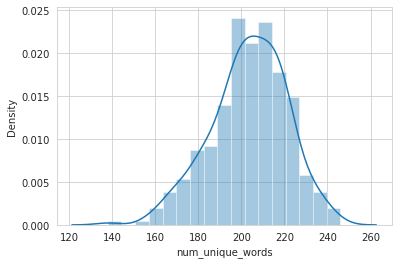

In [86]:
sns.distplot(df['num_unique_words']);

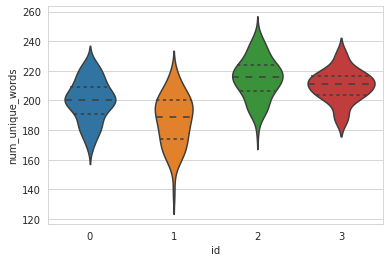

In [87]:
sns.violinplot(x="id", y="num_unique_words", data=df, split=True, inner='quartile');

## Modeling


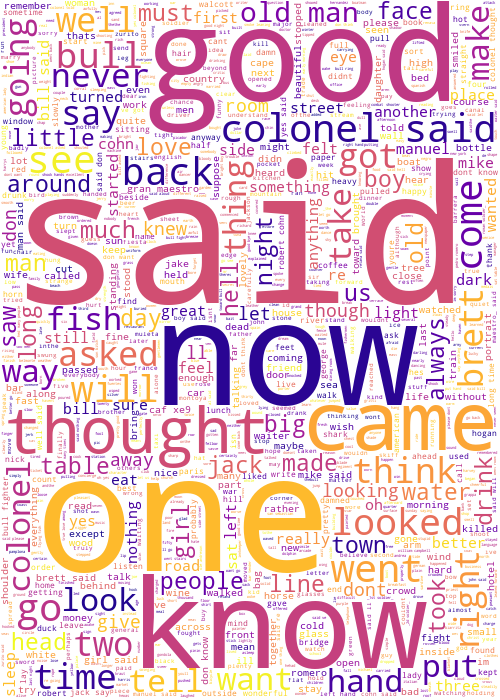

In [45]:
from wordcloud import WordCloud

long_string = ','.join(list(df['book_text_processed'].values))

wordcloud = WordCloud(background_color="white", max_words=2500, contour_width=3, contour_color='black',width = 500, height = 700, colormap='plasma')

wordcloud.generate(long_string)

wordcloud.to_image()

## Conclusion


After finishing this project, I realized there are so many different ways to visualiazing data. As a business anaylst, one could utilize all the advanced cloud tool like AWS Comprehend and QuickSight; one could also write codes in python and use visualization library like matplotlib. 

Since I don't have a strong computer science background, I found it easier and quikcer to analyze data by using AWS. AWS offers many powerful tools for different purposes. I used Amazon Rekognition to scan the cover of Hemingway's "The Sun Also Rises"; I used Amazon CompZrehend to detect entities and determines the sentiment of the text. 

Writing codes is another approach. Although I was struggling with many syntax errors, with the mentor's help, I successfully restructured the txt files and examine the unique words in four books. As the diagrams shown in the EDA section, each book has around 200 unique words. Moreover, the violin plot shows that Hemingway's "Old Man and Sea" has the highest "unique word" density.

Wordcloud is another useful visualization tool for text. It directly identiful words that use the most often in a colorful way. As the wordcloud shown in the modeling section, the most commonly used words in the collection are "said", "now", "good", "one", and "know." From this information, I presume there are a lot of dialogues within these four books. 